1.1) Loading the attached Titanic dataset into a Pandas DataFrame
mounting the google drive data with colab so that i can access the csv file

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 1.2) Displaying the first few rows of the dataset.

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1.3) the summary information of the DataFrame, including the number of rows and columns, and the data types of each column.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


1.4) Identifing and listing any columns with missing values and the percentage of missing values in each column.

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


2.1) Identifying the missing values and their percentages (Already done in the previous section)
Drop columns with more than 50% missing values

In [ ]:
df = df.dropna(thresh=len(df)*0.5, axis=1)

2.2) Handling rows with missing values in critical columns

In [ ]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked'])

2.3) Converting columns to appropriate data types

In [ ]:
df.loc[:, 'Survived'] = df['Survived'].astype('category')
df.loc[:, 'Pclass'] = df['Pclass'].astype('category')
df.loc[:, 'Sex'] = df['Sex'].astype('category')
df.loc[:, 'Embarked'] = df['Embarked'].astype('category')
#using loc for labeling the column data

2.4) Removing duplicates

In [ ]:
df = df.drop_duplicates()

3.1) Summary statistics for numerical columns

In [ ]:
print(df.describe())

       PassengerId         Age       SibSp       Parch        Fare
count   889.000000  889.000000  889.000000  889.000000  889.000000
mean    446.000000   29.315152    0.524184    0.382452   32.096681
std     256.998173   12.984932    1.103705    0.806761   49.697504
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     224.000000   22.000000    0.000000    0.000000    7.895800
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200


3.2) Analyzing the distribution of passenger ages

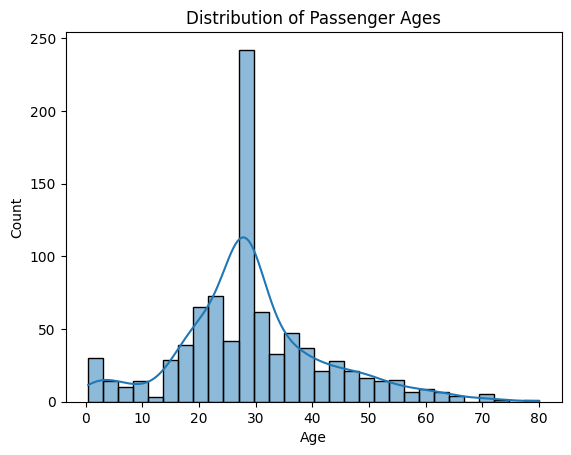

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Passenger Ages')
plt.show()

3.3) Comparing survival rates across different passenger classes

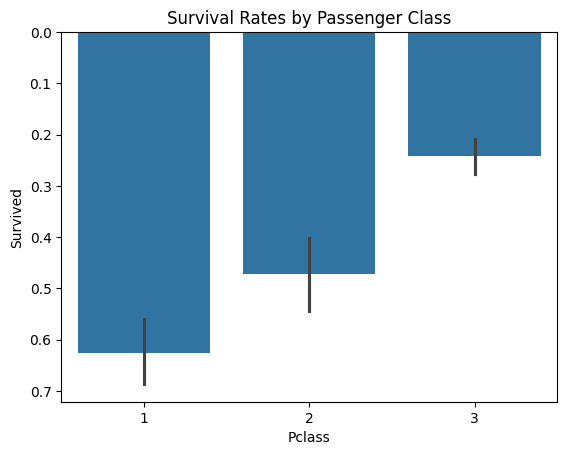

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rates by Passenger Class')
plt.show()

3.4) Analyzing survival rates based on gender

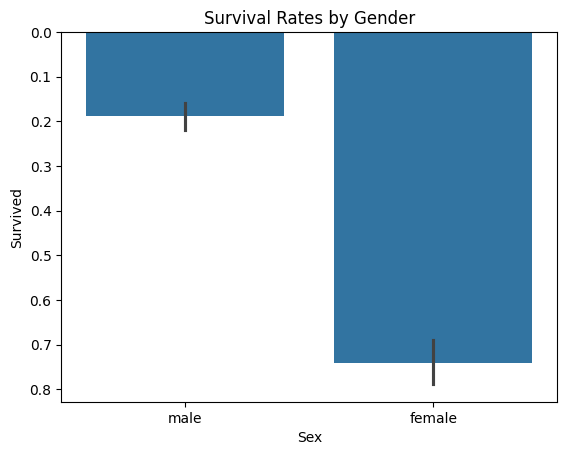

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rates by Gender')
plt.show()

3.5) Calculating the correlation matrix for numerical features

In [ ]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
print(corr_matrix)

             PassengerId       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.031319 -0.057686 -0.001657  0.012703
Age             0.031319  1.000000 -0.232543 -0.171485  0.093707
SibSp          -0.057686 -0.232543  1.000000  0.414542  0.160887
Parch          -0.001657 -0.171485  0.414542  1.000000  0.217532
Fare            0.012703  0.093707  0.160887  0.217532  1.000000


3.6) Creating a heatmap to visualize the correlations matrix of numerical features

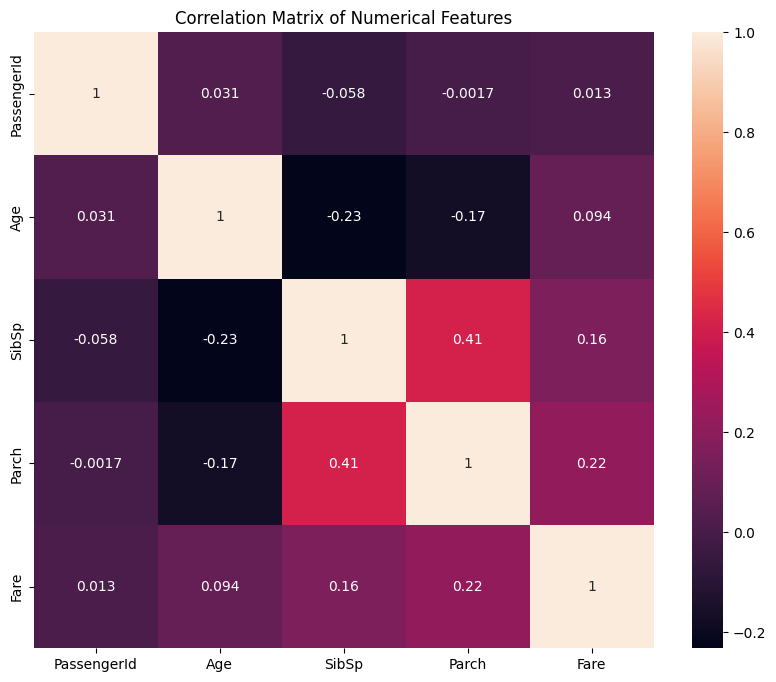

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

4.1) Bar plot of passenger classes

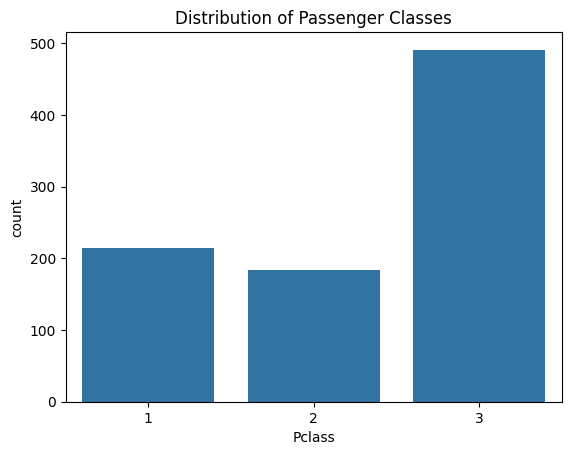

In [ ]:
  sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Classes')
plt.show()

4.2) Pie chart of survival status with the help of percentage values

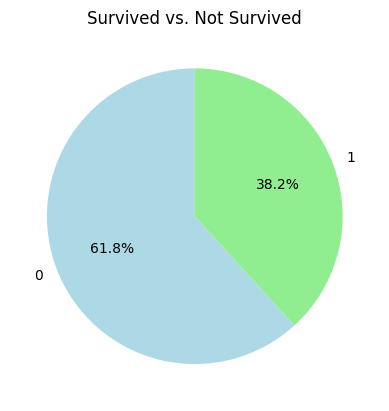

In [ ]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Survived vs. Not Survived')
plt.ylabel('')
plt.show()

4.3) Histogram of fares and head count

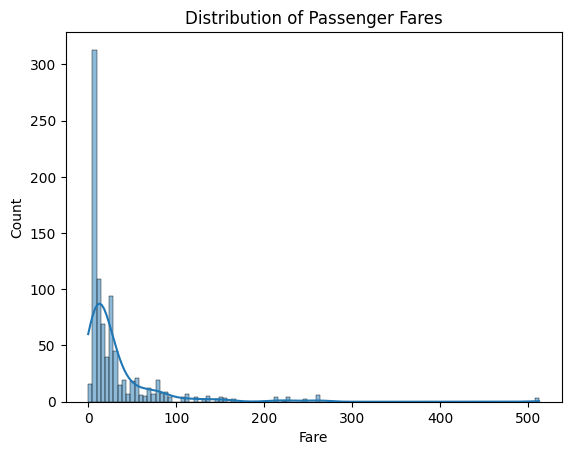

In [ ]:
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Passenger Fares')
plt.show()

4.4) Box plots comparing fare distribution across passenger classes

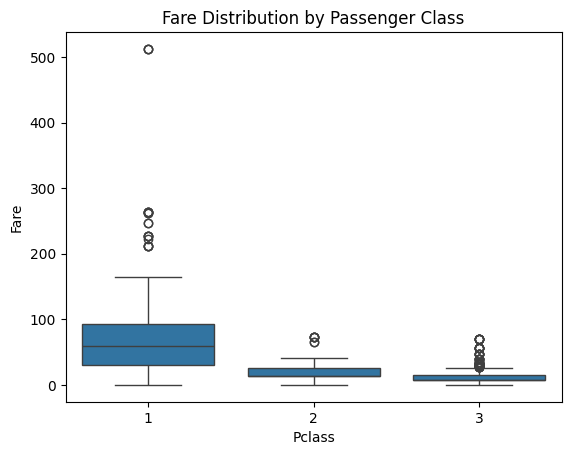

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()